## Libraries

In [51]:
import csv
import pandas as pd
import seaborn as sns

## Load Dataset

[Dataset](https://cseweb.ucsd.edu/~jmcauley/datasets.html#twitch)

In [58]:
header1 = ["User ID", "Stream ID", "Streamer Username", "Time Start", "Time Stop"]

df = pd.read_csv("full_a.csv", nrows = 1e5, header = None, names = header1)
df[df['User ID'] == 2]

,User ID,Stream ID,Streamer Username,Time Start,Time Stop
44,2,34302820672,mattie,4969,4974
45,2,34342297872,goldglove,5334,5337
46,2,34355796976,goldglove,5476,5478
47,2,34362322016,rtgamecrowd,5554,5566
48,2,34396737984,carlosstory,5914,5918
49,2,34396886576,witwix,5910,5919
50,2,34410905408,witwix,6073,6076
51,2,34411115296,witwix,6077,6081


In [59]:
#Check for duplicates
df.duplicated().sum()

0

In [60]:
#This is for this dataset
#Full Dataset has 15million users

len(df['User ID'].unique()) 

3354

## Exploratory Data Analysis

In [61]:
#How many streamers do people usually watch?
df['Streamers Watched'] = df.groupby(['User ID'])['Streamer Username'].transform('count')
df

,User ID,Stream ID,Streamer Username,Time Start,Time Stop,Streamers Watched
0,1,33827518864,lirik,25,26,44
1,1,33870289680,giantwaffle,457,460,44
2,1,33876317008,blacklisted86,471,472,44
3,1,33882713200,cohhcarnage,544,550,44
4,1,33885628720,lirik,586,588,44
...,...,...,...,...,...,...
99995,3354,33853518400,handongsuk,255,256,5
99996,3354,33853894096,horusb,254,255,5
99997,3354,33879776560,pacific8815,517,518,5
99998,3354,33881001328,nanajam777,517,519,5


In [62]:
#Checking to make sure
df[df['User ID'] == 3354]

,User ID,Stream ID,Streamer Username,Time Start,Time Stop,Streamers Watched
99995,3354,33853518400,handongsuk,255,256,5
99996,3354,33853894096,horusb,254,255,5
99997,3354,33879776560,pacific8815,517,518,5
99998,3354,33881001328,nanajam777,517,519,5
99999,3354,33881473696,yapyap30,538,539,5


<AxesSubplot:xlabel='Streamers Watched', ylabel='Count'>

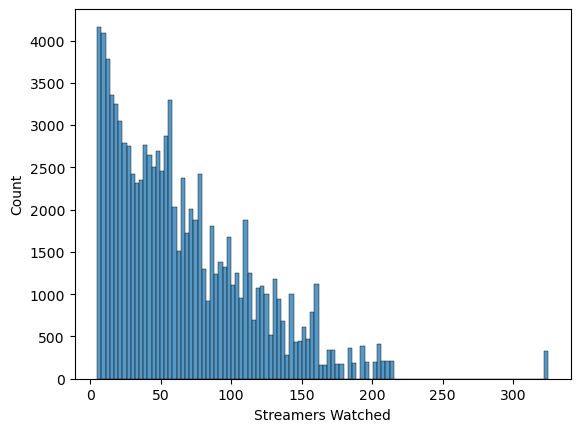

In [63]:
sns.histplot(df['Streamers Watched'])

<AxesSubplot:xlabel='Streamers Watched', ylabel='Count'>

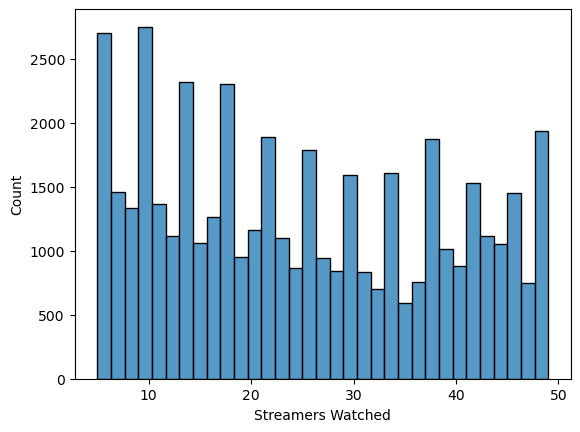

In [64]:
temp = df[df['Streamers Watched'] < 50]['Streamers Watched']
sns.histplot(temp)

In [67]:
a = df.groupby(['Streamer Username', "User ID"])['User ID'].size().reset_index(name="Visits")
a

,Streamer Username,User ID,Visits
0,03supreme30,2179,1
1,092288c,366,1
2,0bsess1,1741,1
3,0ciris,2834,1
4,0miki0_,1698,4
...,...,...,...
48777,zzamtiger0310,3132,2
48778,zzektv,3088,1
48779,zzogur,1993,2
48780,zzosher,977,1


In [66]:
df

,User ID,Stream ID,Streamer Username,Time Start,Time Stop,Streamers Watched
0,1,33827518864,lirik,25,26,44
1,1,33870289680,giantwaffle,457,460,44
2,1,33876317008,blacklisted86,471,472,44
3,1,33882713200,cohhcarnage,544,550,44
4,1,33885628720,lirik,586,588,44
...,...,...,...,...,...,...
99995,3354,33853518400,handongsuk,255,256,5
99996,3354,33853894096,horusb,254,255,5
99997,3354,33879776560,pacific8815,517,518,5
99998,3354,33881001328,nanajam777,517,519,5


In [68]:
df = df.merge(a, on = ["Streamer Username", "User ID"], how = "left")

In [ ]:
df

In [73]:
#What are the people who have loyal people in their streams?
df[df['Visits'] > 20]

,User ID,Stream ID,Streamer Username,Time Start,Time Stop,Streamers Watched,Visits
903,14,33837280576,admiralbulldog,87,93,98,26
906,14,33851487648,admiralbulldog,229,238,98,26
910,14,33911487376,admiralbulldog,805,813,98,26
916,14,33950256512,admiralbulldog,1235,1248,98,26
927,14,34020486352,admiralbulldog,1952,1968,98,26
...,...,...,...,...,...,...,...
99367,3326,34333201520,mobilmobil,5258,5282,159,25
99380,3326,34371890288,mobilmobil,5638,5648,159,25
99383,3326,34375216640,mobilmobil,5683,5697,159,25
99386,3326,34388100592,mobilmobil,5829,5840,159,25


In [108]:
temp = df[df['Visits'] > 10]
temp = temp[['Streamer Username', 'User ID']]
temp = temp.drop_duplicates()
temp = temp.groupby(['Streamer Username']).size().reset_index(name="Loyal Viewers").sort_values(by = ['Loyal Viewers'])
temp[temp['Loyal Viewers'] > 5]

,Streamer Username,Loyal Viewers
241,moonmoon_ow,6
69,chocotaco,6
412,ybicanoooobov,6
237,mobilmobil,7
110,elwind,7
147,hanryang1125,7
7,admiralbulldog,7
261,noway4u_sir,8
255,ninja,8
146,handongsuk,8
